In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('data/Sleep_Efficiency.csv')

# Rename all columns to lower case and replace spaces with underscores
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Drop "id", "wakeup_time", "bedtime"
data = data.drop(columns=["id", "wakeup_time", "bedtime"])

# Hot encoding for "Gender", "Smoking Status"
data = pd.get_dummies(data, columns=["gender", "smoking_status"], drop_first=True)
data.columns = data.columns.str.lower().str.replace(' ', '_')

data_for_imputation = data.copy()

# Impute missing values with the mean of each column
data = data.fillna(data.mean())

# Define the features (X) and target (y)
X = data.drop(columns=['sleep_efficiency'])
y = data['sleep_efficiency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

data.head(n=15)

,age,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,exercise_frequency,gender_male,smoking_status_yes
0,65,6.0,0.88,18,70,12,0.0,0.000000,0.0,3.0,False,True
1,69,7.0,0.66,19,28,53,3.0,0.000000,3.0,3.0,True,True
2,40,8.0,0.89,20,70,10,1.0,0.000000,0.0,3.0,False,False
3,40,6.0,0.51,23,25,52,3.0,50.000000,5.0,1.0,False,True
4,57,8.0,0.76,27,55,18,3.0,0.000000,3.0,3.0,True,False
5,36,7.5,0.90,23,60,17,0.0,23.653396,0.0,1.0,False,False
6,27,6.0,0.54,28,25,47,2.0,50.000000,0.0,1.0,False,True
7,53,10.0,0.90,28,52,20,0.0,50.000000,0.0,3.0,True,True
8,41,6.0,0.79,28,55,17,3.0,50.000000,0.0,1.0,False,False
9,11,9.0,0.55,18,37,45,4.0,0.000000,0.0,0.0,False,False


# Random Forest Imputation vs Mean Imputation

In [99]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# First, isolate the full feature set (including target temporarily)
full_data = data_for_imputation.copy()

# Set up the Iterative Imputer with Random Forest
imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, random_state=0), 
                           max_iter=10, random_state=0)

# Fit and transform the full dataset
imputed_data = imputer.fit_transform(full_data)

# Convert back to a DataFrame (with same column names)
data_imputed = pd.DataFrame(imputed_data, columns=full_data.columns)

X = data_imputed.drop(columns=['sleep_efficiency'])
y = data_imputed['sleep_efficiency']

X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed = train_test_split(X, y, test_size=0.3, random_state=42)

data_imputed.head(n=15)



,age,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,exercise_frequency,gender_male,smoking_status_yes
0,65.0,6.0,0.88,18.0,70.0,12.0,0.0,0.0,0.0,3.0,0.0,1.0
1,69.0,7.0,0.66,19.0,28.0,53.0,3.0,0.0,3.0,3.0,1.0,1.0
2,40.0,8.0,0.89,20.0,70.0,10.0,1.0,0.0,0.0,3.0,0.0,0.0
3,40.0,6.0,0.51,23.0,25.0,52.0,3.0,50.0,5.0,1.0,0.0,1.0
4,57.0,8.0,0.76,27.0,55.0,18.0,3.0,0.0,3.0,3.0,1.0,0.0
5,36.0,7.5,0.90,23.0,60.0,17.0,0.0,50.0,0.0,1.0,0.0,0.0
6,27.0,6.0,0.54,28.0,25.0,47.0,2.0,50.0,0.0,1.0,0.0,1.0
7,53.0,10.0,0.90,28.0,52.0,20.0,0.0,50.0,0.0,3.0,1.0,1.0
8,41.0,6.0,0.79,28.0,55.0,17.0,3.0,50.0,0.0,1.0,0.0,0.0
9,11.0,9.0,0.55,18.0,37.0,45.0,4.0,0.0,0.0,0.0,0.0,0.0


In [100]:
# Scale the data
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_imputed = pd.DataFrame(scaler.fit_transform(data_imputed), columns=data_imputed.columns)

In [ ]:
model = GradientBoostingRegressor()
model.fit(X_train_imputed, y_train_imputed)
y_pred = model.predict(X_test_imputed)

print("Gradient Boosting: Random Forest Imputation Results:")
print("MAE:", mean_absolute_error(y_test_imputed, y_pred))
print("MSE:", mean_squared_error(y_test_imputed, y_pred))
print("R²:", r2_score(y_test_imputed, y_pred))

Gradient Boosting: Random Forest Imputation Results:
MAE: 0.03604100373173799
MSE: 0.00225467073542326
R²: 0.8891021299616942


In [ ]:
# Grid Search for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_imputed, y_train_imputed)
best_model = grid_search.best_estimator_
best_model.fit(X_train_imputed, y_train_imputed)
y_pred_best = best_model.predict(X_test_imputed)

print("Gradient Boosting: Random Forest Imputation Best Gradient Boosting Model Results:")
print("MAE:", mean_absolute_error(y_test_imputed, y_pred_best))
print("MSE:", mean_squared_error(y_test_imputed, y_pred_best))
print("R²:", r2_score(y_test_imputed, y_pred_best))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Gradient Boosting: Random Forest Imputation Best Gradient Boosting Model Results:
MAE: 0.03555162536693457
MSE: 0.002176255547246466
R²: 0.8929590467215718


In [ ]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Gradient Boosting: Mean Imputation Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Gradient Boosting: Mean Imputation Results:
MAE: 0.03834971415082643
MSE: 0.002382253327926104
R²: 0.8828268732067985


In [ ]:
# Grid Search for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test_imputed)

print("Gradient Boosting: Mean Imputation Best Gradient Boosting Model Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("MSE:", mean_squared_error(y_test, y_pred_best))
print("R²:", r2_score(y_test, y_pred_best))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Gradient Boosting: Mean Imputation Best Gradient Boosting Model Results:
MAE: 0.036876843795774404
MSE: 0.0022097341348001247
R²: 0.8913123743302283


In [ ]:
model = RandomForestRegressor()
model.fit(X_train_imputed, y_train_imputed)
y_pred = model.predict(X_test_imputed)
print("Random Forest: Random Forest Imputation Results:")

print("MAE:", mean_absolute_error(y_test_imputed, y_pred))
print("MSE:", mean_squared_error(y_test_imputed, y_pred))
print("R²:", r2_score(y_test_imputed, y_pred))


Random Forest: Random Forest Imputation Results:
MAE: 0.037135294117647086
MSE: 0.0025355758823529494
R²: 0.8752855748488467


In [ ]:
# Grid Search for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_imputed, y_train_imputed)
best_model = grid_search.best_estimator_
best_model.fit(X_train_imputed, y_train_imputed)
y_pred_best = best_model.predict(X_test_imputed)
print("Random Forest: Random Forest Imputation Best Random Forest Model Results:")
print("MAE:", mean_absolute_error(y_test_imputed, y_pred_best))
print("MSE:", mean_squared_error(y_test_imputed, y_pred_best))
print("R²:", r2_score(y_test_imputed, y_pred_best))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Random Forest: Random Forest Imputation Best Random Forest Model Results:
MAE: 0.03741986919494278
MSE: 0.0025544780300784603
R²: 0.8743558568687555


In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Random Forest: Mean Imputation Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Random Forest: Mean Imputation Results:
MAE: 0.0375764705882353
MSE: 0.002552861176470596
R²: 0.8744353831687419


In [ ]:
# Grid Search for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test_imputed)
print("Random Forest: Mean Imputation Best Random Forest Model Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("MSE:", mean_squared_error(y_test, y_pred_best))
print("R²:", r2_score(y_test, y_pred_best))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Random Forest: Mean Imputation Best Random Forest Model Results:
MAE: 0.03765714005913006
MSE: 0.002499467933903987
R²: 0.8770615745598161


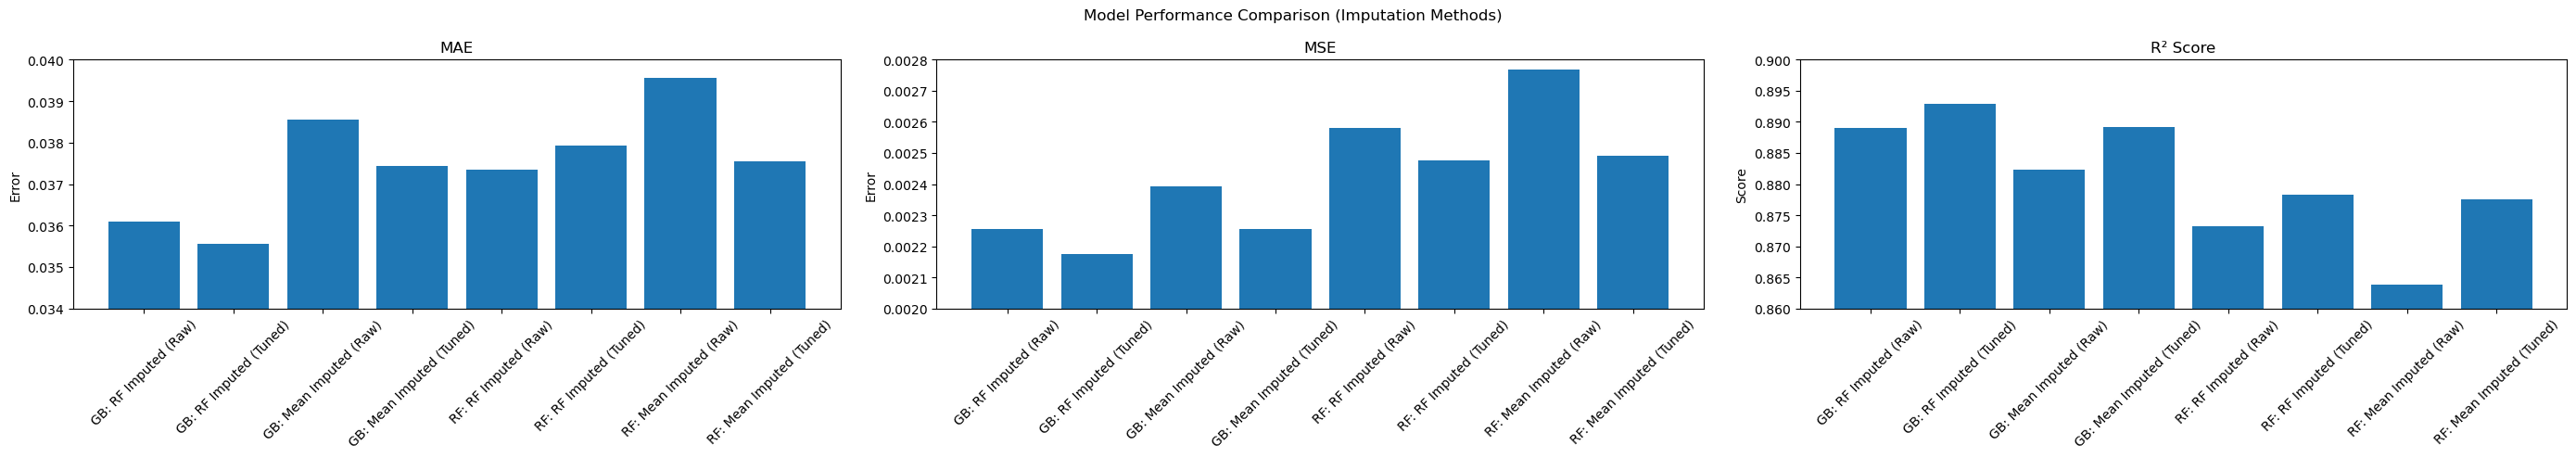

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

# Load and preprocess the data
data = pd.read_csv('./data/Sleep_Efficiency.csv')
data.columns = data.columns.str.lower().str.replace(' ', '_')
data = data.drop(columns=["id", "wakeup_time", "bedtime"])
data = pd.get_dummies(data, columns=["gender", "smoking_status"], drop_first=True)
data.columns = data.columns.str.lower().str.replace(' ', '_')

data_for_imputation = data.copy()
data = data.fillna(data.mean())

X = data.drop(columns=['sleep_efficiency'])
y = data['sleep_efficiency']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Imputation
full_data = data_for_imputation.copy()
imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, random_state=0), max_iter=10, random_state=0)
imputed_data = imputer.fit_transform(full_data)
data_imputed = pd.DataFrame(imputed_data, columns=full_data.columns)
X = data_imputed.drop(columns=['sleep_efficiency'])
y = data_imputed['sleep_efficiency']
X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_imputed = pd.DataFrame(scaler.fit_transform(data_imputed), columns=data_imputed.columns)

# Models to evaluate
results = []

# Define hyperparameter grid
param_grid_gb = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}

# Helper function to evaluate and record
def evaluate_and_record(name, model, X_train, y_train, X_test, y_test, param_grid):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append((name + " (Raw)", mean_absolute_error(y_test, y_pred),
                    mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)))

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    y_pred_best = best_model.predict(X_test)
    results.append((name + " (Tuned)", mean_absolute_error(y_test, y_pred_best),
                    mean_squared_error(y_test, y_pred_best), r2_score(y_test, y_pred_best)))

# Evaluate Gradient Boosting
evaluate_and_record("GB: RF Imputed", GradientBoostingRegressor(), X_train_imputed, y_train_imputed, X_test_imputed, y_test_imputed, param_grid_gb)
evaluate_and_record("GB: Mean Imputed", GradientBoostingRegressor(), X_train, y_train, X_test, y_test, param_grid_gb)

# Evaluate Random Forest
evaluate_and_record("RF: RF Imputed", RandomForestRegressor(), X_train_imputed, y_train_imputed, X_test_imputed, y_test_imputed, param_grid_rf)
evaluate_and_record("RF: Mean Imputed", RandomForestRegressor(), X_train, y_train, X_test, y_test, param_grid_rf)

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "R²"])

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(28, 5))
fig.suptitle("Model Performance Comparison (Imputation Methods)")

axes[0].bar(results_df["Model"], results_df["MAE"])
axes[0].set_title("MAE")
axes[0].set_ylabel("Error")
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0.034, 0.04)

axes[1].bar(results_df["Model"], results_df["MSE"])
axes[1].set_title("MSE")
axes[1].set_ylabel("Error")
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0.002, 0.0028)

axes[2].bar(results_df["Model"], results_df["R²"])
axes[2].set_title("R² Score")
axes[2].set_ylabel("Score")
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_ylim(0.86, 0.90)  # You can adjust this range as needed

plt.tight_layout()
plt.show()
